In [1]:
import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
import Delhi_Analysis

importing Jupyter notebook from Delhi_Analysis.ipynb


In [3]:
df_AHC = pd.DataFrame(Delhi_Analysis.df['DNI(MW)'])
df_KMEANS = pd.DataFrame(Delhi_Analysis.df['DNI(MW)'])



In [4]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [5]:
#Using AHC

In [6]:
c = [i for i in range(1 ,365)]
WCSS = []

for i in range(1 , 365) :
    AHC = AgglomerativeClustering(n_clusters = i , affinity= 'euclidean' , linkage= 'ward')
    df_AHC['cluster'] = AHC.fit_predict(df_AHC)
    wcss = 0
    for j in range (1 , i + 1):
        curr = np.array(df_AHC[df_AHC.cluster == j - 1])
        m = np.array(df_AHC[df_AHC.cluster == j - 1].median())
        w = 0;
        
        for k in range(np.size(curr , axis = 0)) :
            x = np.sum((curr[k] - m) ** 2)
            w += x;
        wcss +=  w
    df_AHC.drop('cluster' , axis = 1 , inplace  = True)
    WCSS.append(wcss)

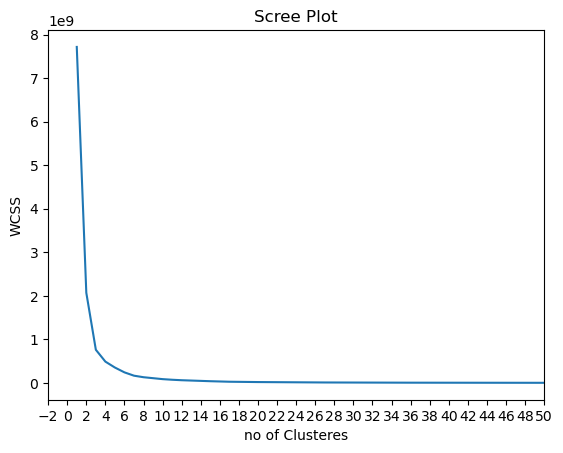

In [7]:
plt.plot(c , WCSS)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [8]:
AHC = AgglomerativeClustering(n_clusters=6, affinity='euclidean' , linkage='ward')
df_AHC['clusters'] = AHC.fit_predict(df_AHC)
res_AHC = df_AHC.groupby('clusters').median()
res_AHC['size'] = df_AHC.groupby('clusters').size()

res_AHC

,DNI(MW),size
clusters,,
0,24314.748750,78
1,29456.302500,75
2,34958.092500,83
3,32101.363125,28
4,27319.646250,44
5,36561.583125,58


In [9]:
#using kmeans
k_range = range(1 , 367)
wcss = []
for k in k_range : 
    km = KMeans(n_clusters = k)
    km.fit(df_KMEANS)
    wcss.append(km.inertia_)
            

C:\Users\Dell\AppData\Local\Temp\ipykernel_3196\3960308530.py:6: ConvergenceWarning: Number of distinct clusters (363) found smaller than n_clusters (364). Possibly due to duplicate points in X.
  km.fit(df_KMEANS)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3196\3960308530.py:6: ConvergenceWarning: Number of distinct clusters (363) found smaller than n_clusters (365). Possibly due to duplicate points in X.
  km.fit(df_KMEANS)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3196\3960308530.py:6: ConvergenceWarning: Number of distinct clusters (363) found smaller than n_clusters (366). Possibly due to duplicate points in X.
  km.fit(df_KMEANS)


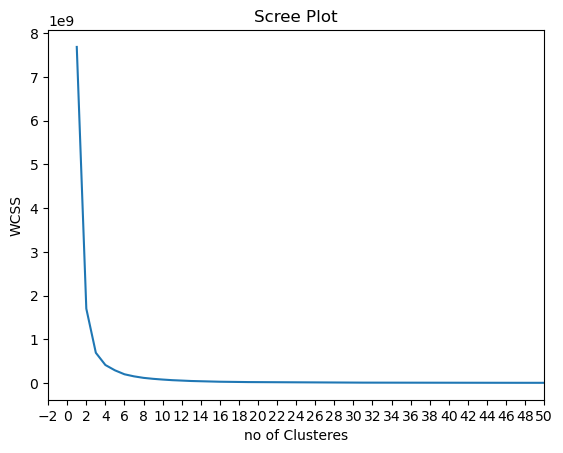

In [10]:
plt.plot(k_range , wcss)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [11]:
KM = KMeans(n_clusters=6)
df_KMEANS['clusters'] = KM.fit_predict(df_KMEANS)
res_KMEANS = df_KMEANS.groupby('clusters').median()
res_KMEANS['size'] = df_KMEANS.groupby('clusters').size()
res_KMEANS

,DNI(MW),size
clusters,,
0,23888.216250,60
1,34938.523125,78
2,26916.277500,62
3,29355.660000,69
4,36463.736250,62
5,31806.225000,35


In [12]:
x = pd.read_csv('Central_Delhi.csv' , header = 10)
df_AHC['MO'] = x['MO']
df_AHC['DY'] = x['DY']
df_KMEANS['MO'] = x['MO']
df_KMEANS['DY'] = x['DY']

In [13]:

#loking for the patteren
pd.set_option('display.max_rows', 10)
df_AHC[df_AHC.clusters == 0]


,DNI(MW),clusters,MO,DY
0,23342.67000,0,1,1
1,24588.72000,0,1,2
2,25130.27250,0,1,3
3,24912.21375,0,1,4
4,25028.83125,0,1,5
...,...,...,...,...
360,24456.12750,0,12,26
362,22055.08500,0,12,28
363,21632.54625,0,12,29
364,24198.93000,0,12,30


In [14]:
#Loking for pattern
df_KMEANS[df_KMEANS.clusters == 0]

,DNI(MW),clusters,MO,DY
0,23342.67000,0,1,1
1,24588.72000,0,1,2
2,25130.27250,0,1,3
3,24912.21375,0,1,4
4,25028.83125,0,1,5
...,...,...,...,...
359,22781.14875,0,12,25
360,24456.12750,0,12,26
362,22055.08500,0,12,28
363,21632.54625,0,12,29
